In [1]:
import numpy as np
import time
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import plotly.graph_objects as go


from plots import plot_membership

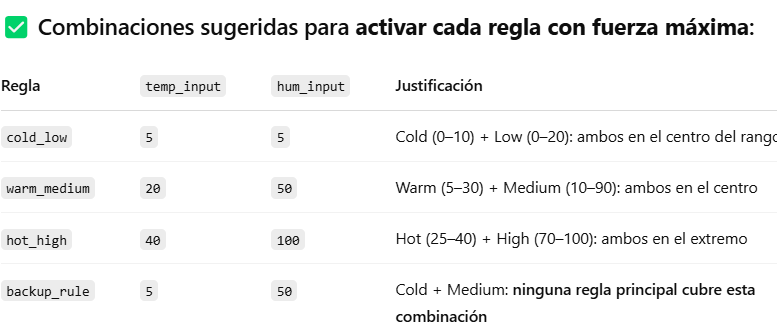

In [28]:
start_time = time.time()

# Definir las variables de entrada
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

# Definir la variable de salida
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Funciones de pertenencia para temperatura
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 10])
temperature['warm'] = fuzz.trimf(temperature.universe, [5, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 40, 40])

# Funciones de membresía para humedad
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 20])
humidity['medium'] = fuzz.trimf(humidity.universe, [10, 50, 90])
humidity['high'] = fuzz.trimf(humidity.universe, [70, 100, 100])

# Funciones para velocidad del ventilador
fan_speed['slow'] = fuzz.trimf(fan_speed.universe, [0, 0, 30])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [20, 50, 80])
fan_speed['fast'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])

# Reglas difusas
rule1 = ctrl.Rule(temperature['cold'] & humidity['low'], fan_speed['slow'], label='cold_low')
rule2 = ctrl.Rule(temperature['warm'] & humidity['medium'], fan_speed['medium'], label='warm_medium')
rule3 = ctrl.Rule(temperature['hot'] & humidity['high'], fan_speed['fast'], label='hot_high')

# Regla de respaldo
rule_backup = ctrl.Rule(
    antecedent=((temperature['cold'] | temperature['warm'] | temperature['hot']) &
                (humidity['low'] | humidity['medium'] | humidity['high'])),
    consequent=fan_speed['medium'],
    label='backup_rule'
)

# Sistema de control
fan_control = ctrl.ControlSystem([rule1, rule2, rule3, rule_backup])
fan_simulation = ctrl.ControlSystemSimulation(fan_control)

# Asignar entradas
temp_input = 5
hum_input = 50
fan_simulation.input['temperature'] = temp_input
fan_simulation.input['humidity'] = hum_input

# Ejecutar inferencia
fan_simulation.compute()

# Mostrar resultados
end_time = time.time()
print(f"📌 Hora inicial del proceso de ejecución: {start_time}")
print(f"💨 Velocidad del ventilador: {fan_simulation.output['fan_speed']:.2f}%")
print(f"📌 Hora final del proceso de ejecución: {end_time}")
print(f"⏱️ Duración: {(end_time - start_time) * 1000:.2f} milisegundos")

📌 Hora inicial del proceso de ejecución: 1744153278.603957
💨 Velocidad del ventilador: 50.00%
📌 Hora final del proceso de ejecución: 1744153278.6082404
⏱️ Duración: 4.28 milisegundos


In [29]:
# Evaluaciones:
eval_temp = temp_input
eval_hum = hum_input
fan_output = fan_simulation.output['fan_speed']

# Mostrar gráficos con la función modular
plot_membership(temperature, eval_temp, "Funciones de Membresía - Temperatura", "Temperatura (°C)", "Temp").show()
plot_membership(humidity, eval_hum, "Funciones de Membresía - Humedad", "Humedad (%)", "Humedad").show()
plot_membership(fan_speed, fan_output, "Funciones de Membresía - Velocidad del Ventilador", "Velocidad (%)", "Salida").show()
